In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
# Геометрія області
x0, xe = 0, 1  # Межі по осі x
y0, ye = 0, 1  # Межі по осі y
Nx, Ny = 50, 50  # Кількість точок у сітці
dx = (xe - x0) / (Nx - 1)  # Крок по x
dy = (ye - y0) / (Ny - 1)  # Крок по y

# Просторова сітка
x = np.linspace(x0, xe, Nx)
y = np.linspace(y0, ye, Ny)

# Ініціалізація температури
T = np.zeros((Nx, Ny))

In [3]:
# Фізичні параметри
alpha = 0.01  # Коефіцієнт теплопровідності
k = 0.1  # Коефіцієнт тепловіддачі
T_env = 25  # Температура навколишнього середовища

# Часові параметри
dt = min(dx**2, dy**2) / (4 * alpha)  # Умова стійкості
time_steps = 100  # Кількість ітерацій

# Початковий розподіл температури
T_body = 36.6  # Температура здорових тканин
T_tumor = 55.0  # Температура пухлини

# Визначення області пухлини
tumor_radius = 0.2  # Радіус пухлини
center_x, center_y = 0.5, 0.5  # Координати центру пухлини

In [4]:
for i in range(Nx):
    for j in range(Ny):
        if (x[i] - center_x)**2 + (y[j] - center_y)**2 <= tumor_radius**2:
            T[i, j] = T_tumor
        else:
            T[i, j] = T_body

for n in range(time_steps):
    T_new = T.copy()
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            laplacian = (T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dx**2 + \
                        (T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dy**2
            T_new[i, j] = T[i, j] + dt * (alpha * laplacian - k * (T[i, j] - T_env))
    T = T_new.copy()

In [5]:
limited_Nx, limited_Ny = 6, 6
limited_dx, limited_dy = dx * (Nx / limited_Nx), dy * (Ny / limited_Ny)

header = "| x/y   " + " | ".join([f"y={round(j * limited_dy, 2):<5}" for j in range(limited_Ny)]) + " |\n"
separator = "|-------" + "|".join(["------" for _ in range(limited_Ny)]) + "|\n"
rows = ""
for i in range(limited_Nx):
    row_values = " | ".join([f"{T[int(i * (Nx / limited_Nx)), int(j * (Ny / limited_Ny))]:<5.2f}" for j in range(limited_Ny)])
    rows += f"| x={round(i * limited_dx, 2):<5} | {row_values} |\n"

table_10x10 = header + separator + rows
print(table_10x10)

| x/y   y=0.0   | y=0.17  | y=0.34  | y=0.51  | y=0.68  | y=0.85  |
|-------------|------|------|------|------|------|
| x=0.0   | 36.60 | 36.60 | 36.60 | 36.60 | 36.60 | 36.60 |
| x=0.17  | 36.60 | 35.96 | 36.71 | 37.35 | 36.71 | 35.96 |
| x=0.34  | 36.60 | 36.71 | 39.72 | 42.01 | 39.72 | 36.71 |
| x=0.51  | 36.60 | 37.35 | 42.01 | 45.60 | 42.01 | 37.35 |
| x=0.68  | 36.60 | 36.71 | 39.72 | 42.01 | 39.72 | 36.71 |
| x=0.85  | 36.60 | 35.96 | 36.71 | 37.35 | 36.71 | 35.96 |



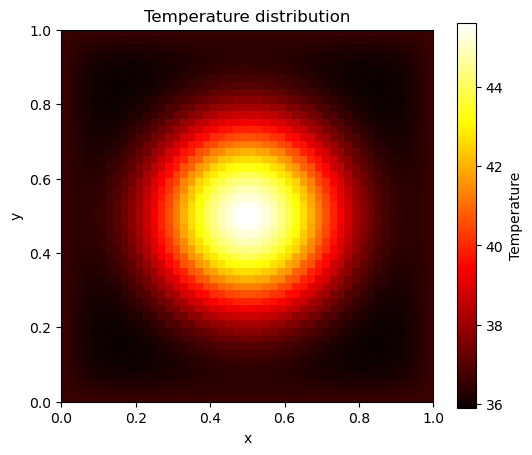

In [6]:
plt.figure(figsize=(6, 5))
plt.imshow(T, extent=[x0, xe, y0, ye], origin='lower', cmap='hot')
plt.colorbar(label='Temperature')
plt.title('Temperature distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

/var/folders/p8/8ll5qb0j72d3wvl51rdbc65h0000gn/T/ipykernel_8847/3763248883.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, exceed_mask, levels=[0.5], colors='blue', linewidths=2, label='Exceeds T_max')


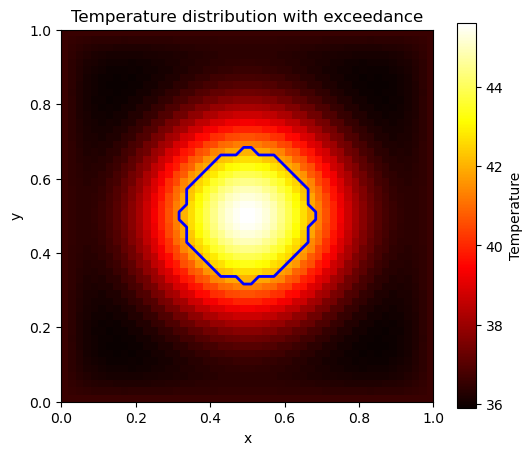

In [7]:

T_max = 42.0

exceed_mask = T > T_max

# Візуалізація температурного поля
plt.figure(figsize=(6, 5))
plt.imshow(T, extent=[x0, xe, y0, ye], origin='lower', cmap='hot')
plt.colorbar(label='Temperature')
plt.contour(x, y, exceed_mask, levels=[0.5], colors='blue', linewidths=2, label='Exceeds T_max')
plt.title('Temperature distribution with exceedance')
plt.xlabel('x')
plt.ylabel('y')
plt.show()